In [1]:
from astrocut import fits_cut
from astropy.io import fits
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import asdf
from asdf import AsdfFile
import asdf

# For example 4
from astropy.table import Table

# For example 6
from astropy.modeling import models
from astropy import coordinates as coord
from astropy import units as u
from astropy.wcs import WCS
from gwcs import wcs
from gwcs.wcstools import wcs_from_fiducial

In [2]:
%matplotlib inline

In [3]:
url = "https://archive.stsci.edu/pub/hlsp/candels/cosmos/cos-tot/v1.0/"
input_files = [url + "hlsp_candels_hst_acs_cos-tot-sect23_f606w_v1.0_drz.fits"]

In [4]:
center_coord = SkyCoord("150.0946 2.38681", unit='deg')
cutout_size = [100,100]

In [5]:
cutout_file = fits_cut(input_files, center_coord, cutout_size, 
                       drop_after="", single_outfile=True)

In [6]:
print(cutout_file)

./cutout_150.094600_2.386810_100-x-100_astrocut.fits


In [7]:
cutout_hdulist = fits.open(cutout_file)
cutout_hdulist.info()

Filename: ./cutout_150.094600_2.386810_100-x-100_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  CUTOUT        1 ImageHDU        45   (100, 100)   float32   


In [8]:
data = cutout_hdulist[1].data
header0 = cutout_hdulist[0].header
header1 = cutout_hdulist[1].header

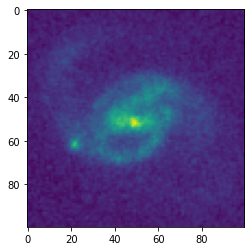

In [9]:
plt.imshow(data)

In [10]:
header1

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
OBJECT  = 'COS_2EPOCH_ACS_F606W_030MAS_V1.0_SECT23_DRZ[1/1]'                    
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2012-12-31T17:40:43'                                                 
IRAFNAME= 'cos_2epoch_acs_f606w_030mas_v1.0_sect23_drz.hhh'  /  NAME OF IRAF IMA
IRAF-MAX=           0.000000E0  /  DATA MAX                                     
IRAF-MIN=           0.000000

In [11]:
tree1 = {**header1} 

In [12]:
myfile = AsdfFile(tree1)

In [13]:
myfile.tree

{'XTENSION': 'IMAGE',
 'BITPIX': -32,
 'NAXIS': 2,
 'NAXIS1': 100,
 'NAXIS2': 100,
 'PCOUNT': 0,
 'GCOUNT': 1,
 'OBJECT': 'COS_2EPOCH_ACS_F606W_030MAS_V1.0_SECT23_DRZ[1/1]',
 'ORIGIN': 'KPNO-IRAF',
 'DATE': '2012-12-31T17:40:43',
 'IRAFNAME': 'cos_2epoch_acs_f606w_030mas_v1.0_sect23_drz.hhh',
 'IRAF-MAX': 0.0,
 'IRAF-MIN': 0.0,
 'IRAF-BPX': 32,
 'IRAFTYPE': 'REAL',
 'DATAMIN': 0.0,
 'DATAMAX': 0.0,
 'CRPIX1': -2553.5,
 'CRVAL1': 150.1163213,
 'CTYPE1': 'RA---TAN',
 'CD1_1': -8.333333e-06,
 'CD2_1': 0.0,
 'CRPIX2': -22249.5,
 'CRVAL2': 2.200973097,
 'CTYPE2': 'DEC--TAN',
 'CD1_2': 0.0,
 'CD2_2': 8.333333e-06,
 'FILETYPE': 'SCI',
 'WCSAXES': 2,
 'PC1_1': -8.333333e-06,
 'PC2_2': 8.333333e-06,
 'CDELT1': 1.0,
 'CDELT2': 1.0,
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'LONPOLE': 180.0,
 'LATPOLE': 2.200973097,
 'MJDREF': 0.0,
 'RADESYS': 'ICRS',
 'EXTNAME': 'CUTOUT',
 'ORIG_FLE': 'hlsp_candels_hst_hst_candels-v1.0_acs_f606w_drz.fits',
 'CHECKSUM': 'e9ITh9FQe9FQe9FQ',
 'DATASUM': '2083243318'}

In [14]:
toss_these = ['XTENSION','BITPIX','NAXIS','NAXIS1','NAXIS2','CHECKSUM',
              'DATASUM','EXTNAME','FILETYPE','PCOUNT','GCOUNT',
              'IRAF-BPX','IRAF-MIN','IRAF-MAX','IRAFNAME','IRAFTYPE']
annotated_tree = {}
for card in header1.cards:
    if card[0] not in toss_these:
        annotated_tree[card[0]]=(card[1],card[2])

In [15]:
myfile = AsdfFile(annotated_tree)

In [16]:
myfile.tree

{'OBJECT': ('COS_2EPOCH_ACS_F606W_030MAS_V1.0_SECT23_DRZ[1/1]', ''),
 'ORIGIN': ('NOAO-IRAF FITS Image Kernel July 2003', 'FITS file originator'),
 'DATE': ('2012-05-19T15:15:35', ''),
 'DATAMIN': (0.0, ''),
 'DATAMAX': (0.0, ''),
 'CRPIX1': (-2553.5, 'Pixel coordinate of reference point'),
 'CRVAL1': (150.1163213, '[deg] Coordinate value at reference point'),
 'CTYPE1': ('RA---TAN', 'Right ascension, gnomonic projection'),
 'CD1_1': (-8.333333e-06, ''),
 'CD2_1': (0.0, ''),
 'CRPIX2': (-22249.5, 'Pixel coordinate of reference point'),
 'CRVAL2': (2.200973097, '[deg] Coordinate value at reference point'),
 'CTYPE2': ('DEC--TAN', 'Declination, gnomonic projection'),
 'CD1_2': (0.0, ''),
 'CD2_2': (8.333333e-06, ''),
 'WCSAXES': (2, 'Number of coordinate axes'),
 'PC1_1': (-8.333333e-06, 'Coordinate transformation matrix element'),
 'PC2_2': (8.333333e-06, 'Coordinate transformation matrix element'),
 'CDELT1': (1.0, '[deg] Coordinate increment at reference point'),
 'CDELT2': (1.0, '[de

In [17]:
myfile['CRVAL1'][0]

150.1163213

In [18]:
def tree_to_table(tree):
    keys = list(tree.keys())
    values, other = ([] for i in range(2))
    for k in keys:
        try:
            values += [tree[k][0]]
            other += [tree[k][1]]
        except:
            values += [None]
            other += [tree[k]]
    return Table([keys,values,other],names=['key','value','comment or data structure'])

In [19]:
t = tree_to_table(myfile.tree)
t.show_in_notebook()

idx,key,value,comment or data structure
0,OBJECT,COS_2EPOCH_ACS_F606W_030MAS_V1.0_SECT23_DRZ[1/1],
1,ORIGIN,NOAO-IRAF FITS Image Kernel July 2003,FITS file originator
2,DATE,2012-05-19T15:15:35,
3,DATAMIN,0.0,
4,DATAMAX,0.0,
5,CRPIX1,-2553.5,Pixel coordinate of reference point
6,CRVAL1,150.1163213,[deg] Coordinate value at reference point
7,CTYPE1,RA---TAN,"Right ascension, gnomonic projection"
8,CD1_1,-8.333333e-06,
9,CD2_1,0.0,


In [20]:
myfile['data'] = data # Equivalent to myfile.tree['data'] = data

In [21]:
myfile['data']

array([[-1.8097271e-03,  2.6454803e-05, -2.6360032e-04, ...,
        -9.7416568e-04,  2.4262909e-04,  2.4123930e-03],
       [-3.5285766e-03, -1.8192229e-03,  3.0580107e-03, ...,
         1.6773099e-04,  2.3124062e-03,  5.8371830e-03],
       [-2.3947342e-03, -2.9570116e-03, -3.7189680e-03, ...,
        -4.2302650e-03, -1.6698018e-03, -2.3997191e-04],
       ...,
       [ 5.1750882e-05,  2.0913549e-03,  2.9933613e-03, ...,
         1.9218342e-03,  8.1874104e-03,  5.8503388e-03],
       [ 6.2804343e-03,  5.8753230e-03, -1.3653117e-03, ...,
        -2.3874418e-04,  3.9537032e-03,  1.0296787e-03],
       [ 2.7859493e-04, -9.5667562e-04, -7.1171736e-03, ...,
         2.2009623e-03,  1.1198068e-03,  4.6209744e-03]], dtype=float32)

In [22]:
myfile.write_to('myfile.asdf')

In [23]:
ff = asdf.open('myfile.asdf')
ff.tree

{'asdf_library': {'author': 'The ASDF Developers',
  'homepage': 'http://github.com/asdf-format/asdf',
  'name': 'asdf',
  'version': '2.10.1'},
 'history': {'extensions': [{'extension_class': 'asdf.extension.BuiltinExtension',
    'software': {'name': 'asdf', 'version': '2.10.1'}}]},
 'CD1_1': [-8.333333e-06, ''],
 'CD1_2': [0.0, ''],
 'CD2_1': [0.0, ''],
 'CD2_2': [8.333333e-06, ''],
 'CDELT1': [1.0, '[deg] Coordinate increment at reference point'],
 'CDELT2': [1.0, '[deg] Coordinate increment at reference point'],
 'CRPIX1': [-2553.5, 'Pixel coordinate of reference point'],
 'CRPIX2': [-22249.5, 'Pixel coordinate of reference point'],
 'CRVAL1': [150.1163213, '[deg] Coordinate value at reference point'],
 'CRVAL2': [2.200973097, '[deg] Coordinate value at reference point'],
 'CTYPE1': ['RA---TAN', 'Right ascension, gnomonic projection'],
 'CTYPE2': ['DEC--TAN', 'Declination, gnomonic projection'],
 'CUNIT1': ['deg', 'Units of coordinate increment and value'],
 'CUNIT2': ['deg', 'Uni

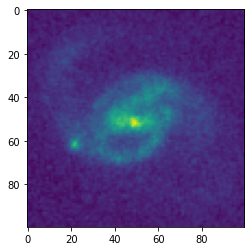

In [24]:
plt.imshow(ff['data'])

In [25]:
header0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'STScI/MAST'         / institution responsible for creating this file 
DATE    = '2022-04-25'         / file creation date                             
PROCVER = '0.5     '           / software version                               
RA_OBJ  =             150.0946 / [deg] right ascension                          
DEC_OBJ =              2.38681 / [deg] declination                              
CHECKSUM= 'Wl8Fai5DYi5Dai5D'   / HDU checksum updated 2022-04-25T16:40:59       
DATASUM = '0       '           / data unit checksum updated 2022-04-25T16:40:59 

In [26]:
keywords = ['ORIGIN','DATE','PROCVER','RA_OBJ','DEC_OBJ']
primary_header = {}
for card in header0.cards:
    if card[0] in keywords:
        primary_header[card[0]]=(card[1],card[2])
ff.tree['primary_header'] = primary_header
ff.tree

{'asdf_library': {'author': 'The ASDF Developers',
  'homepage': 'http://github.com/asdf-format/asdf',
  'name': 'asdf',
  'version': '2.10.1'},
 'history': {'extensions': [{'extension_class': 'asdf.extension.BuiltinExtension',
    'software': {'name': 'asdf', 'version': '2.10.1'}}]},
 'CD1_1': [-8.333333e-06, ''],
 'CD1_2': [0.0, ''],
 'CD2_1': [0.0, ''],
 'CD2_2': [8.333333e-06, ''],
 'CDELT1': [1.0, '[deg] Coordinate increment at reference point'],
 'CDELT2': [1.0, '[deg] Coordinate increment at reference point'],
 'CRPIX1': [-2553.5, 'Pixel coordinate of reference point'],
 'CRPIX2': [-22249.5, 'Pixel coordinate of reference point'],
 'CRVAL1': [150.1163213, '[deg] Coordinate value at reference point'],
 'CRVAL2': [2.200973097, '[deg] Coordinate value at reference point'],
 'CTYPE1': ['RA---TAN', 'Right ascension, gnomonic projection'],
 'CTYPE2': ['DEC--TAN', 'Declination, gnomonic projection'],
 'CUNIT1': ['deg', 'Units of coordinate increment and value'],
 'CUNIT2': ['deg', 'Uni

In [27]:
fitswcs = WCS(header1)
fitswcs

2022-04-25 16:41:01,911 - stpipe - WARNING - /Users/gough/opt/miniconda3/envs/py3810/lib/python3.8/site-packages/astropy/wcs/wcs.py:2879: RuntimeWarning: cdelt will be ignored since cd is present
  description.append(s.format(*self.wcs.cdelt))



WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 150.1163213  2.200973097  
CRPIX : -2553.5  -22249.5  
PC1_1 PC1_2  : -8.333333e-06  0.0  
PC2_1 PC2_2  : 0.0  8.333333e-06  
CDELT : 1.0  1.0  
NAXIS : 100  100

In [28]:
crval1, crval2 = fitswcs.wcs.crval
cunit1, cunit2 = [u.Unit(cu) for cu in fitswcs.wcs.cunit]
pcmatrix = fitswcs.wcs.pc
cunit1, cunit2

(Unit("deg"), Unit("deg"))

In [29]:
fiducial = coord.SkyCoord(crval1*cunit1, crval2*cunit2, frame='icrs')
tan = models.Pix2Sky_TAN()

In [30]:
trans = models.Shift(-crval1) & models.Shift(-crval2) |\
        models.Scale(-pcmatrix[0,0]) & models.Scale(pcmatrix[1,1])

In [31]:
wcsobj = wcs_from_fiducial(fiducial, projection=tan, transform=trans)
wcsobj

<WCS(output_frame=CelestialFrame, input_frame=None, forward_transform=Model: CompoundModel
Inputs: ('x0', 'x1')
Outputs: ('alpha_C', 'delta_C')
Model set size: 1
Expression: [0] & [1] | [2] & [3] | [4] | [5]
Components: 
    [0]: <Shift(offset=-150.1163213)>

    [1]: <Shift(offset=-2.2009731)>

    [2]: <Scale(factor=0.00000833)>

    [3]: <Scale(factor=0.00000833)>

    [4]: <Pix2Sky_Gnomonic()>

    [5]: <RotateNative2Celestial(lon=150.1163213 deg, lat=2.2009731 deg, lon_pole=180. deg)>
Parameters:
      offset_0     offset_1     factor_2     factor_3      lon_5       lat_5    lon_pole_5
                                                            deg         deg        deg    
    ------------ ------------ ------------ ------------ ----------- ----------- ----------
    -150.1163213 -2.200973097 8.333333e-06 8.333333e-06 150.1163213 2.200973097      180.0)>

In [32]:
fits_wcs_keywords = [
    'CRPIX1', 'CRVAL1', 'CTYPE1', 'CD1_1', 'CD2_1', 'CRPIX2', 'CRVAL2', 
    'CTYPE2', 'CD1_2', 'CD2_2', 'WCSAXES', 'PC1_1', 'PC2_2', 'CDELT1', 
    'CDELT2', 'CUNIT1', 'CUNIT2', 'LONPOLE', 'LATPOLE', 'RADESYS']
[ff.tree.pop(old_kw, None) for old_kw in fits_wcs_keywords];

In [33]:
ff.tree['wcs'] = wcsobj

In [34]:
t = tree_to_table(ff.tree)
t.show_in_notebook()

idx,key,value,comment or data structure
0,asdf_library,None,"{'author': 'The ASDF Developers', 'homepage': 'http://github.com/asdf-format/asdf', 'name': 'asdf', 'version': '2.10.1'}"
1,history,None,"{'extensions': [{'extension_class': 'asdf.extension.BuiltinExtension', 'software': {'name': 'asdf', 'version': '2.10.1'}}]}"
2,DATAMAX,0.0,
3,DATAMIN,0.0,
4,DATE,2012-05-19T15:15:35,
5,MJDREF,0.0,[d] MJD of fiducial time
6,OBJECT,COS_2EPOCH_ACS_F606W_030MAS_V1.0_SECT23_DRZ[1/1],
7,ORIGIN,NOAO-IRAF FITS Image Kernel July 2003,FITS file originator
8,ORIG_FLE,hlsp_candels_hst_hst_candels-v1.0_acs_f606w_drz.fits,Original imag
9,data,[-1.80972705e-03 2.64548034e-05 -2.63600319e-04 1.42299559e-03 2.02666456e-03 -1.17879244e-04 3.37513071e-03 2.49592029e-03 3.04455054e-03 1.94292085e-03 4.74532740e-03 1.81267620e-03 5.18500165e-04 7.53829721e-04 9.66044317e-04 7.09087937e-04 3.14008095e-03 1.35860278e-03 4.81493538e-03 5.10630617e-03 4.88533219e-03 4.36257338e-03 1.68357894e-03 6.62868842e-04 -2.26245308e-03 -3.70197045e-03 -1.07296021e-03 -7.64733530e-04 -4.15749848e-04 -1.84519531e-03 7.24298356e-04 9.74487630e-04 2.15133373e-03 3.29656817e-04 -1.46984460e-03 -1.00637844e-03 -1.76835584e-03 1.25491107e-03 3.45191476e-03 6.48635541e-05 5.98746026e-03 5.72868623e-03 5.25044650e-03 1.48071221e-03 2.93879583e-03 -5.88457333e-05 2.88247503e-03 -6.52714749e-04 -1.01292671e-05 -3.86311061e-04 2.91337492e-03 3.67482868e-03 -8.25248018e-04 6.31759118e-04 3.33856139e-03 3.93944234e-03 1.30851753e-03 4.22561867e-03 2.36554584e-03 -3.61910765e-03 -3.90761206e-03 -4.05893428e-03 -1.22328533e-03 -2.05516722e-06 -5.46598202e-03 -2.86481599e-03 1.67676108e-03 1.22905069e-03 1.32165919e-03 1.58867298e-03 -1.88102061e-03 -2.73425505e-03 -4.90673818e-04 4.58174758e-03 -8.69360738e-05 -1.78016233e-03 2.16756156e-03 -4.98418789e-03 -2.01716903e-03 6.11356273e-03 8.95318575e-03 2.79917405e-03 5.37021924e-03 4.10461752e-03 5.36447763e-03 4.74915560e-03 2.12171534e-03 3.79772135e-03 -1.71951356e-03 -9.02462343e-04 1.02200871e-03 1.94186834e-03 4.11595451e-03 2.45072530e-04 -1.47819007e-03 -1.40658361e-04 3.04506510e-03 -9.74165683e-04 2.42629088e-04 2.41239299e-03],[-3.5285766e-03 -1.8192229e-03 3.0580107e-03 1.6007033e-03 3.6224448e-03 2.7060518e-03 1.2749480e-03 1.3470568e-03 1.8427958e-03 -3.5110614e-05 1.4986293e-03 -1.4584361e-03 4.4596489e-03 1.6422151e-03 1.4192211e-03 4.8224065e-03 3.1663834e-03 1.9639430e-03 1.1488033e-03 9.8296034e-04 8.6029730e-04 1.9832077e-03 4.4655036e-03 1.0121678e-03 -2.5000417e-04 -3.8567206e-04 4.3078119e-04 -9.8889321e-04 -9.5898422e-06 1.2715780e-03 2.5364875e-03 1.3316403e-03 4.3301447e-03 -3.7733690e-04 2.9079339e-03 5.7165548e-03 4.9572031e-04 9.4903598e-04 6.6862437e-03 2.3506758e-05 1.3536765e-03 5.0447690e-03 6.8185097e-03 2.3460956e-03 3.5042656e-03 -1.1005823e-03 3.0319365e-03 3.7640061e-03 5.6033669e-04 -1.5554525e-04 2.5631054e-03 4.3259887e-03 4.6940800e-03 3.4385212e-03 2.3886526e-03 4.7347086e-04 2.7097634e-03 2.7067796e-03 -1.6210712e-03 -2.7788831e-03 2.9007150e-03 -7.3607574e-04 1.3692537e-03 3.9761327e-03 3.3614611e-05 -3.0711363e-03 -2.3587530e-03 -3.5246201e-03 -1.6987674e-03 -1.3082373e-03 -2.9413188e-03 -2.0986989e-03 -8.5365726e-04 4.5589488e-03 2.8716535e-03 -6.3624902e-04 -3.6070605e-03 -1.1311107e-03 -3.2325505e-04 5.9431130e-03 7.2869742e-03 4.1382583e-03 5.1301010e-03 3.5174743e-03 3.5133504e-03 5.0075622e-03 1.4934880e-03 6.8450585e-04 -2.8544536e-04 1.1839201e-04 -1.5747600e-03 -1.3098399e-03 1.7829004e-03 -2.0791390e-03 6.1440142e-04 4.3888455e-03 3.1758491e-03 1.6773099e-04 2.3124062e-03 5.8371830e-03]
